## 따릉이 데이터를 활용한 데이터 분석

- 각 날짜의 1시간 전의 기상상황을 가지고 1시간 후의 따릉이 대여수를 예측해보세요. 

## 1. 라이브러리 및 데이터
## Library & Data

In [1]:
import numpy as np
import pandas as pd #판다스 패키지 불러오기
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor #랜덤 포레스트 불러오기
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import pandas_profiling

In [2]:
# 데이터 불러오기
df_train = pd.read_csv('data/train.csv')# 모델 학습 파일
df_test = pd.read_csv('data/test.csv')# 모델 시험지 파일
submission = pd.read_csv('data/submission.csv')#답안지 파일 

## 2. 탐색적 자료분석
## Exploratory Data Analysis (EDA)


In [3]:
df_train.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


+ id : 날짜와 시간별 id
+ hour_bef_temperature : 1시간 전 기온
+ hour_bef_precipitation : 1시간 전 비 정보, 비가 오지 않았으면 0, 비가 오면 1
+ hour_bef_windspeed : 1시간 전 풍속(평균)
+ hour_bef_humidity : 1시간 전 습도
+ hour_bef_visibility : 1시간 전 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)
+ hour_bef_ozone : 1시간 전 오존
+ hour_bef_pm10 : 1시간 전 미세먼지(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
+ hour_bef_pm2.5 : 1시간 전 미세먼지(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)
+ count : 시간에 따른 따릉이 대여 수 

In [4]:
df_test.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,0,7,20.7,0.0,1.3,62.0,954.0,0.041,44.0,27.0
1,1,17,30.0,0.0,5.4,33.0,1590.0,0.061,49.0,36.0
2,2,13,19.0,1.0,2.1,95.0,193.0,0.020,36.0,28.0
3,4,6,22.5,0.0,2.5,60.0,1185.0,0.027,52.0,38.0
4,5,22,14.6,1.0,3.4,93.0,218.0,0.041,18.0,15.0


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      715 non-null    int64  
 1   hour                    715 non-null    int64  
 2   hour_bef_temperature    714 non-null    float64
 3   hour_bef_precipitation  714 non-null    float64
 4   hour_bef_windspeed      714 non-null    float64
 5   hour_bef_humidity       714 non-null    float64
 6   hour_bef_visibility     714 non-null    float64
 7   hour_bef_ozone          680 non-null    float64
 8   hour_bef_pm10           678 non-null    float64
 9   hour_bef_pm2.5          679 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 56.0 KB


In [7]:
#df_train.profile_report()

In [8]:
df_train.describe()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
count,1459.000000,1459.000000,1457.000000,1457.000000,1450.000000,1457.000000,1457.000000,1383.000000,1369.000000,1342.000000,1459.000000
mean,1105.914325,11.493489,16.717433,0.031572,2.479034,52.231297,1405.216884,0.039149,57.168736,30.327124,108.563400
std,631.338681,6.922790,5.239150,0.174917,1.378265,20.370387,583.131708,0.019509,31.771019,14.713252,82.631733
min,3.000000,0.000000,3.100000,0.000000,0.000000,7.000000,78.000000,0.003000,9.000000,8.000000,1.000000
25%,555.500000,5.500000,12.800000,0.000000,1.400000,36.000000,879.000000,0.025500,36.000000,20.000000,37.000000
50%,1115.000000,11.000000,16.600000,0.000000,2.300000,51.000000,1577.000000,0.039000,51.000000,26.000000,96.000000
75%,1651.000000,17.500000,20.100000,0.000000,3.400000,69.000000,1994.000000,0.052000,69.000000,37.000000,150.000000
max,2179.000000,23.000000,30.000000,1.000000,8.000000,99.000000,2000.000000,0.125000,269.000000,90.000000,431.000000


In [9]:
df_train.describe()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
count,1459.000000,1459.000000,1457.000000,1457.000000,1450.000000,1457.000000,1457.000000,1383.000000,1369.000000,1342.000000,1459.000000
mean,1105.914325,11.493489,16.717433,0.031572,2.479034,52.231297,1405.216884,0.039149,57.168736,30.327124,108.563400
std,631.338681,6.922790,5.239150,0.174917,1.378265,20.370387,583.131708,0.019509,31.771019,14.713252,82.631733
min,3.000000,0.000000,3.100000,0.000000,0.000000,7.000000,78.000000,0.003000,9.000000,8.000000,1.000000
25%,555.500000,5.500000,12.800000,0.000000,1.400000,36.000000,879.000000,0.025500,36.000000,20.000000,37.000000
50%,1115.000000,11.000000,16.600000,0.000000,2.300000,51.000000,1577.000000,0.039000,51.000000,26.000000,96.000000
75%,1651.000000,17.500000,20.100000,0.000000,3.400000,69.000000,1994.000000,0.052000,69.000000,37.000000,150.000000
max,2179.000000,23.000000,30.000000,1.000000,8.000000,99.000000,2000.000000,0.125000,269.000000,90.000000,431.000000


Text(0.5, 0, 'time')

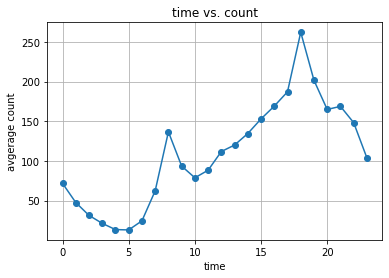

In [10]:
plt.plot(df_train.groupby('hour').mean()['count'], 'o-')
plt.grid()
plt.title('time vs. count')
plt.ylabel('avgerage count')
plt.xlabel('time')

Text(0.5, 0, 'temp')

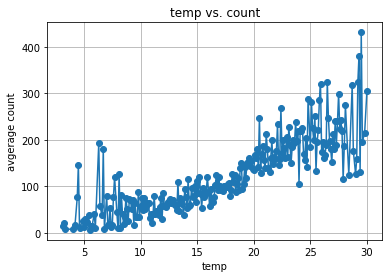

In [11]:
plt.plot(df_train.groupby('hour_bef_temperature').mean()['count'], 'o-')
plt.grid()
plt.title('temp vs. count')
plt.ylabel('avgerage count')
plt.xlabel('temp')

Text(0.5, 0, 'precipitation')

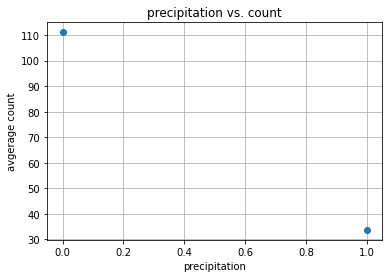

In [12]:
plt.plot(df_train.groupby('hour_bef_precipitation').mean()['count'], 'o')
plt.grid()
plt.title('precipitation vs. count')
plt.ylabel('avgerage count')
plt.xlabel('precipitation')

Text(0.5, 0, 'windspeed')

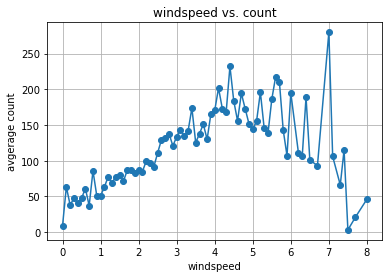

In [13]:
plt.plot(df_train.groupby('hour_bef_windspeed').mean()['count'], 'o-')
plt.grid()
plt.title('windspeed vs. count')
plt.ylabel('avgerage count')
plt.xlabel('windspeed')

Text(0.5, 0, 'humidity')

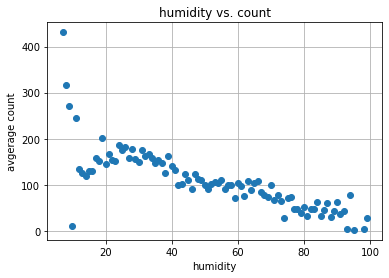

In [14]:
plt.plot(df_train.groupby('hour_bef_humidity').mean()['count'], 'o')
plt.grid()
plt.title('humidity vs. count')
plt.ylabel('avgerage count')
plt.xlabel('humidity')

Text(0.5, 0, 'visibility')

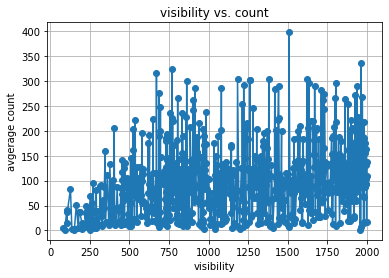

In [15]:
plt.plot(df_train.groupby('hour_bef_visibility').mean()['count'], 'o-')
plt.grid()
plt.title('visibility vs. count')
plt.ylabel('avgerage count')
plt.xlabel('visibility')

Text(0.5, 0, 'ozon')

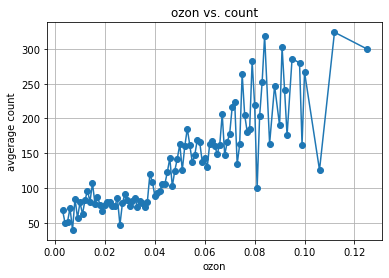

In [16]:
plt.plot(df_train.groupby('hour_bef_ozone').mean()['count'], 'o-')
plt.grid()
plt.title('ozon vs. count')
plt.ylabel('avgerage count')
plt.xlabel('ozon')

Text(0.5, 0, 'pm10')

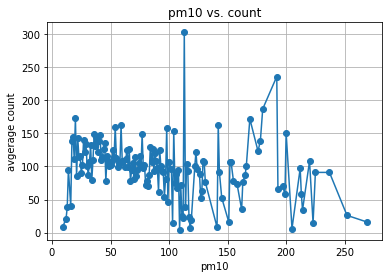

In [17]:
plt.plot(df_train.groupby('hour_bef_pm10').mean()['count'], 'o-')
plt.grid()
plt.title('pm10 vs. count')
plt.ylabel('avgerage count')
plt.xlabel('pm10')

Text(0.5, 0, 'pm2.5')

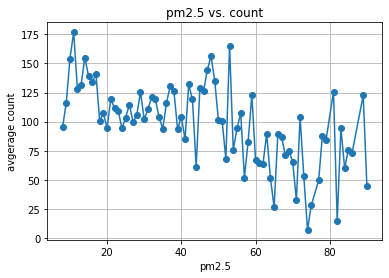

In [18]:
plt.plot(df_train.groupby('hour_bef_pm2.5').mean()['count'], 'o-')
plt.grid()
plt.title('pm2.5 vs. count')
plt.ylabel('avgerage count')
plt.xlabel('pm2.5')

## 3. 데이터 전처리
## Data Cleansing & Pre-Processing  

In [19]:
df_train.drop(["hour_bef_visibility", "hour_bef_ozone", "hour_bef_pm10", "hour_bef_pm2.5"], axis = 1, inplace = True)
df_test.drop(["hour_bef_visibility", "hour_bef_ozone", "hour_bef_pm10", "hour_bef_pm2.5"], axis = 1, inplace = True)
df_train.head()
df_test.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity
0,0,7,20.7,0.0,1.3,62.0
1,1,17,30.0,0.0,5.4,33.0
2,2,13,19.0,1.0,2.1,95.0
3,4,6,22.5,0.0,2.5,60.0
4,5,22,14.6,1.0,3.4,93.0


In [20]:
df_train[df_train['hour_bef_temperature'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,count
934,1420,0,NaN,NaN,NaN,NaN,39.0
1035,1553,18,NaN,NaN,NaN,NaN,1.0


In [21]:
df_train[df_train['hour_bef_precipitation'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,count
934,1420,0,NaN,NaN,NaN,NaN,39.0
1035,1553,18,NaN,NaN,NaN,NaN,1.0


In [22]:
df_train[df_train['hour_bef_windspeed'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,count
18,33,13,22.6,0.0,NaN,41.0,208.0
244,381,1,14.1,0.0,NaN,55.0,38.0
260,404,3,14.0,0.0,NaN,50.0,17.0
376,570,0,14.3,0.0,NaN,49.0,58.0
780,1196,20,16.5,0.0,NaN,31.0,181.0
934,1420,0,NaN,NaN,NaN,NaN,39.0
1035,1553,18,NaN,NaN,NaN,NaN,1.0
1138,1717,12,21.4,0.0,NaN,44.0,116.0
1229,1855,2,14.0,0.0,NaN,52.0,20.0


In [34]:
df_test[df_test['hour_bef_temperature'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity
653,1943,0.826087,NaN,NaN,NaN,NaN


In [36]:
df_test['hour_bef_temperature'].fillna(19.704918, inplace = True)
df_test['hour_bef_precipitation'].fillna(df_train["hour_bef_precipitation"].median(), inplace = True)
df_test['hour_bef_windspeed'].fillna(df_train["hour_bef_windspeed"].median(), inplace = True)
df_test['hour_bef_humidity'].fillna(df_train["hour_bef_humidity"].median(), inplace = True)

### Wind speed 결측된 row 모두 삭제

In [37]:
df_train.dropna(axis=0, how='any', inplace = True)

### 스케일링

In [38]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
df_train['hour'] = sc.fit_transform(df_train['hour'].values.reshape(-1,1))
df_test['hour'] = sc.transform(df_test['hour'].values.reshape(-1,1))

df_train['hour_bef_temperature'] = sc.fit_transform(df_train['hour_bef_temperature'].values.reshape(-1,1))
df_test['hour_bef_temperature'] = sc.transform(df_test['hour_bef_temperature'].values.reshape(-1,1))

df_train['hour_bef_precipitation'] = sc.fit_transform(df_train['hour_bef_precipitation'].values.reshape(-1,1))
df_test['hour_bef_precipitation'] = sc.transform(df_test['hour_bef_precipitation'].values.reshape(-1,1))

df_train['hour_bef_windspeed'] = sc.fit_transform(df_train['hour_bef_windspeed'].values.reshape(-1,1))
df_test['hour_bef_windspeed'] = sc.transform(df_test['hour_bef_windspeed'].values.reshape(-1,1))

df_train['hour_bef_humidity'] = sc.fit_transform(df_train['hour_bef_humidity'].values.reshape(-1,1))
df_test['hour_bef_humidity'] = sc.transform(df_test['hour_bef_humidity'].values.reshape(-1,1))

## 4. 변수 선택 및 모델 구축
## Feature Engineering & Initial Modeling  

In [47]:
features = ['hour', 'hour_bef_temperature', 'hour_bef_precipitation', 'hour_bef_windspeed', 'hour_bef_humidity']
x_train = df_train[features]
y_train = df_train['count']
x_test = df_test[features]

### sklearn.ensemble.RandomForestRegressor()
- 랜덤 포레스트 모형

In [48]:
model100 = RandomForestRegressor(n_estimators=100, random_state=0)
model100_5 = RandomForestRegressor(n_estimators=100, max_depth = 5, random_state=0)
model200 = RandomForestRegressor(n_estimators=200, random_state=0) 

## 5. 모델 학습 및 검증
## Model Tuning & Evaluation

### model.fit()
- 모델 학습

In [49]:
model100.fit(x_train, y_train)
model100_5.fit(x_train, y_train)
model200.fit(x_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=0)

### model.predict()
- 모델 예측

In [56]:
ypred100 = model100.predict(x_test)
ypred100_5 = model100_5.predict(x_test)
ypred200 = model200.predict(x_test)

array([ 86., 250.,  71.,  31.,  67., 110., 152., 371.,  46., 127., 296.,
       254., 107.,  46., 197., 141.,  27., 161., 383., 199., 196.,  77.,
        19., 117., 142., 101.,  29.,  97., 119., 121.,  82.,  30.,  69.,
       146., 243.,  41., 132.,  75., 219.,  82.,  52., 117., 121.,  68.,
       329., 200.,  89.,  68.,  15.,  90., 203.,  92., 177.,  55., 154.,
       118.,  46., 170.,  17.,  18.,  86.,  83., 268., 315., 143., 322.,
        15., 217., 128.,  22., 106.,  32., 151.,  15., 304., 168.,  38.,
       144., 219.,  18., 250., 121.,  73.,  85.,  91., 307.,  51., 139.,
        88., 285., 320., 187.,  68., 100.,  39.,  89.,  97.,  27., 233.,
       147.,  20., 124.,  34., 126.,  86.,  62., 104.,  19., 164., 116.,
       191., 185., 153., 111.,  66., 114., 240.,  40., 167.,  18., 100.,
       118., 179.,  99.,  48., 112.,  46.,  19., 237.,  55., 120., 183.,
        18., 144., 301., 120.,  41., 123., 266., 376., 227.,  26.,  38.,
        77.,  99., 118., 113., 114., 161., 166., 11

### pd.DataFrame.to_csv()
 - csv파일 저장하는 함수

In [60]:
import math

submission['count'] = ypred100.round()
submission.to_csv('model100.csv', index = False)

submission['count'] = ypred100_5.round()
submission.to_csv('model100_5.csv', index = False)

submission['count'] = ypred200.round()
submission.to_csv('model200.csv', index = False)

## 6. 결과 및 결언
## Conclusion & Discussion